In [2]:
%pip install matplotlib pandas numpy scikit-learn seaborn mlflow

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mlflow-2.19.0-py3-none-any.whl.metadata (30 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached mlflow_skinny-2.19.0-py3-none-any.whl.metadata (31 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached alembic-1.14.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached data

In [ ]:
!pip install tensorflow==2.10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import mlflow

In [2]:
import tensorflow as tf;
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
pd.set_option('display.max_columns', None) # display all columns

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.isna().sum().sum()

0

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
mlflow.set_experiment('diabetes_classification')

<Experiment: artifact_location='file:///c:/Users/Pc/Desktop/HTU/2024-2025/Artificial%20Intelligence/diabetes_classification/mlruns/157510782472443811', creation_time=1735926115394, experiment_id='157510782472443811', last_update_time=1735926115394, lifecycle_stage='active', name='diabetes_classification', tags={}>

### Using LogisticRegression Model

In [ ]:
mlflow.start_run(run_name='LogisticRegression')

In [10]:
from sklearn.linear_model import LogisticRegression
from mlflow.models.signature import infer_signature

# model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# log model
mlflow.sklearn.log_model(lr, "model", signature=infer_signature(X_train, lr.predict(X_train)))
mlflow.log_params(params)

d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Presicion: 0.544214487300094
Recall: 0.16535658139202516
Accuracy: 0.8657954903815831
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

--------------------------------------------------


<Figure size 640x480 with 0 Axes>

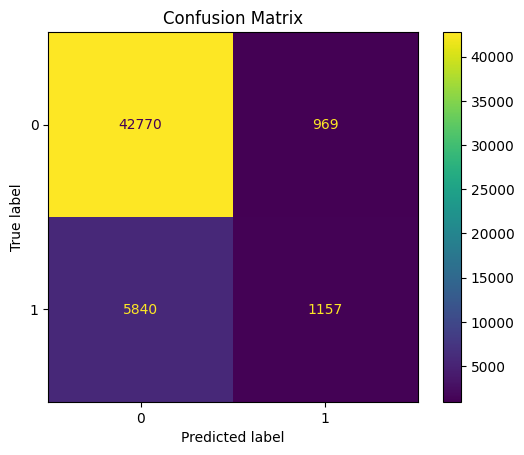

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = lr.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
presicion, recall, f1 = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

# log metrics
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("presicion", presicion)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1_score)

# get confusion matrix values
conf_matrix = confusion_matrix(y_test,y_pred)
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

# log confusion matrix values
mlflow.log_metric("true_positive", true_positive)
mlflow.log_metric("true_negative", true_negative)
mlflow.log_metric("false_positive", false_positive)
mlflow.log_metric("false_negative", false_negative)

# Save confusion matrix plot to a file
plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
# plt.close()

# Log the saved plot as an artifact
mlflow.log_artifact("confusion_matrix.png","confusion_matrix")

print(f"Presicion: {presicion}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print('-'*50)
print(f"Classification Report:\n{class_report}")
print('-'*50)
plt.show()

In [12]:
mlflow.end_run()

### Using Neural Network Model

In [26]:
mlflow.start_run(run_name='binary_dense_model_v2')

<ActiveRun: >

In [27]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [28]:
# Build binary_dense_model for binary classification
binary_dense_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(32, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

binary_dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Log binary_dense_model hyperparameters
mlflow.log_param("optimizer", "adam")
mlflow.log_param("loss", "binary_crossentropy")
mlflow.log_param("metrics", "accuracy")

'accuracy'

Train binary_dense_model

In [31]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            mlflow.log_metric("training_accuracy", logs.get("accuracy", 0.0), step=epoch)
            mlflow.log_metric("training_loss", logs.get("loss", 0.0), step=epoch)
            mlflow.log_metric("validation_accuracy", logs.get("val_accuracy", 0.0), step=epoch)
            mlflow.log_metric("validation_loss", logs.get("val_loss", 0.0), step=epoch)

# Hyperparameters
EPOCHS = 25
BATCH_SIZE = 32

# Reshape y_train and y_test to match the shape of y_pred
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Train binary_dense_model
history = binary_dense_model.fit(
    X_train_scaled, y_train_reshaped,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_data=(X_test_scaled, y_test_reshaped),
    callbacks=[CustomCallback()]
)

# Log hyperparameters
mlflow.log_param("epochs", EPOCHS)
mlflow.log_param("batch_size", BATCH_SIZE)

# Log the binary_dense_model
mlflow.tensorflow.log_model(binary_dense_model, "binary_dense_model_v2")


Epoch 1/25
6342/6342 [==============================] - 22s 3ms/step - loss: 0.3259 - accuracy: 0.8628 - val_loss: 0.3224 - val_accuracy: 0.8654
Epoch 2/25
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3182 - accuracy: 0.8648 - val_loss: 0.3150 - val_accuracy: 0.8620
Epoch 3/25
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3164 - accuracy: 0.8654 - val_loss: 0.3107 - val_accuracy: 0.8663
Epoch 4/25
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3156 - accuracy: 0.8654 - val_loss: 0.3095 - val_accuracy: 0.8676
Epoch 5/25
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3150 - accuracy: 0.8654 - val_loss: 0.3116 - val_accuracy: 0.8682
Epoch 6/25
6342/6342 [==============================] - 24s 4ms/step - loss: 0.3147 - accuracy: 0.8659 - val_loss: 0.3096 - val_accuracy: 0.8679
Epoch 7/25
6342/6342 [==============================] - 24s 4ms/step - loss: 0.3143 - accuracy: 0.8659 - val_loss: 0.3100 - val_ac

2025/01/04 21:42:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\Pc\AppData\Local\Temp\tmphsb3v1a6\model\data\model\assets


2025/01/04 21:43:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [36]:
y_pred = binary_dense_model.predict(X_test_scaled)
y_pred.shape

1586/1586 [==============================] - 5s 3ms/step


(50736, 1, 1)

In [35]:
y_test

219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
         ... 
169513    1.0
182415    0.0
109739    0.0
181671    0.0
202118    0.0
Name: Diabetes_binary, Length: 50736, dtype: float64

Presicion: 0.5638051044083526
Recall: 0.173645848220666
Accuracy: 0.8675102491327656
F1 Score: 0.26551573426573427
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.17      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

--------------------------------------------------


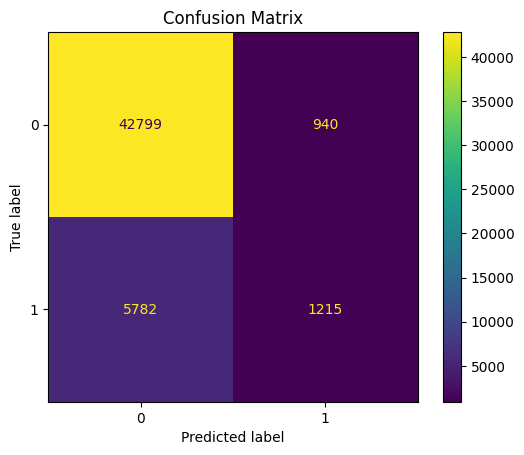

In [40]:
# Convert y_pred to binary values
y_pred_binary = np.where(y_pred > 0.5, 1, 0).reshape(-1)

# metrics
accuracy = accuracy_score(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
presicion, recall, f1 = precision_score(y_test, y_pred_binary), recall_score(y_test, y_pred_binary), f1_score(y_test, y_pred_binary)

print(f"Presicion: {presicion}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print('-'*50)
print(f"Classification Report:\n{class_report}")
print('-'*50)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

Presicion: 0.5638051044083526
Recall: 0.173645848220666
Accuracy: 0.8675102491327656
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.17      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

--------------------------------------------------


<Figure size 640x480 with 0 Axes>

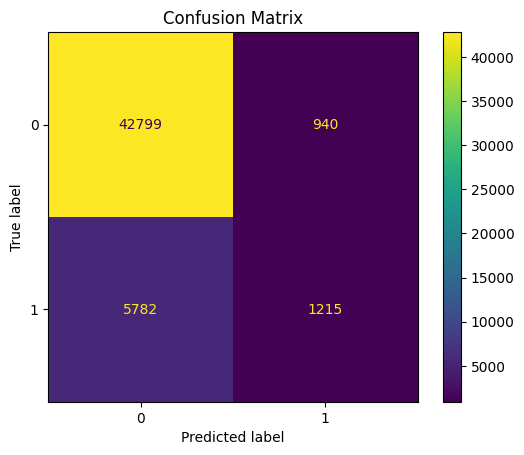

In [41]:
# metrics
accuracy = accuracy_score(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
presicion, recall, f1 = precision_score(y_test, y_pred_binary), recall_score(y_test, y_pred_binary), f1_score(y_test, y_pred_binary)

# log metrics
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("presicion", presicion)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

# get confusion matrix values
conf_matrix = confusion_matrix(y_test,y_pred_binary)
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

# log confusion matrix values
mlflow.log_metric("true_positive", true_positive)
mlflow.log_metric("true_negative", true_negative)
mlflow.log_metric("false_positive", false_positive)
mlflow.log_metric("false_negative", false_negative)

# Save confusion matrix plot to a file
plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
# plt.close()

# Log the saved plot as an artifact
mlflow.log_artifact("confusion_matrix.png","confusion_matrix")

print(f"Presicion: {presicion}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print('-'*50)
print(f"Classification Report:\n{class_report}")
print('-'*50)
plt.show()

In [43]:
binary_dense_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1, 64)             1408      
                                                                 
 dense_7 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_8 (Dense)             (None, 1, 24)             792       
                                                                 
 dense_9 (Dense)             (None, 1, 1)              25        
                                                                 
Total params: 4,305
Trainable params: 4,305
Non-trainable params: 0
_________________________________________________________________


In [45]:
params = binary_dense_model.count_params()
mlflow.log_param("params", params)

4305

In [26]:
mlflow.end_run()

### RandomForestClassifier

In [ ]:
mlflow.start_run(run_name="RandomForestClassifier_v2")

<ActiveRun: >

In [15]:
mlflow.start_run(run_id="1b23bd62b47f473bba9933960e845e8c")

<ActiveRun: >

In [8]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameters
params_rf = {
    "n_estimators": 500,
    "random_state": 42,
    "n_jobs": -1
}

# Log hyperparameters
mlflow.log_params(params_rf)

rf = RandomForestClassifier(**params_rf)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [16]:
mlflow.sklearn.log_model(rf, "RandomForestClassifier_v2")

2025/01/05 14:03:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [9]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

<Figure size 640x480 with 0 Axes>

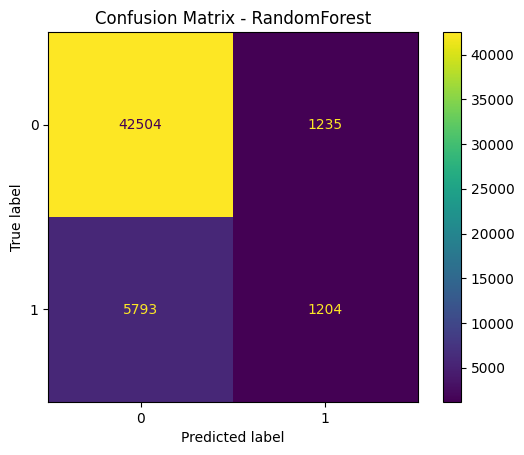

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf = precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)

# Log metrics
mlflow.log_metric("accuracy", accuracy_rf)
mlflow.log_metric("precision", precision_rf)
mlflow.log_metric("recall", recall_rf)
mlflow.log_metric("f1_score", f1_rf)

# Get confusion matrix values
true_positive_rf = conf_matrix_rf[0][0]
true_negative_rf = conf_matrix_rf[1][1]
false_positive_rf = conf_matrix_rf[0][1]
false_negative_rf = conf_matrix_rf[1][0]

# Log confusion matrix values
mlflow.log_metric("true_positive", true_positive_rf)
mlflow.log_metric("true_negative", true_negative_rf)
mlflow.log_metric("false_positive", false_positive_rf)
mlflow.log_metric("false_negative", false_negative_rf)

# Save confusion matrix plot to a file
plt.figure()
ConfusionMatrixDisplay(conf_matrix_rf).plot()
plt.title('Confusion Matrix - RandomForest')
plt.savefig('confusion_matrix_rf.png')
# plt.close()

# Log the saved plot as an artifact
mlflow.log_artifact("confusion_matrix_rf.png", "confusion_matrix_rf")
plt.show()

In [11]:
print(f"Presicion: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Accuracy: {accuracy_rf}")
print('-'*50)
print(f"Classification Report:\n{class_report_rf}")
print('-'*50)

Presicion: 0.49364493644936447
Recall: 0.1720737458910962
Accuracy: 0.8614790286975718
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.49      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.69      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736

--------------------------------------------------


In [20]:
mlflow.end_run()

### Using LogisticRegression model with Cross-Validation and feature selection

In [31]:
mlflow.start_run(run_name='LogisticRegression_CV_v2')
mlflow.set_tag("Feature Selection", True)

In [32]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

sfm = SelectFromModel(model)
sfm.fit(X_train_scaled, y_train)

selected_features = X.columns[sfm.get_support()]
SFM_df = df[selected_features]
SFM_df

,HighBP,HighChol,CholCheck,BMI,HvyAlcoholConsump,GenHlth,Age
0,1.0,1.0,1.0,40.0,0.0,5.0,9.0
1,0.0,0.0,0.0,25.0,0.0,3.0,7.0
2,1.0,1.0,1.0,28.0,0.0,5.0,9.0
3,1.0,0.0,1.0,27.0,0.0,2.0,11.0
4,1.0,1.0,1.0,24.0,0.0,2.0,11.0
...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,3.0,5.0
253676,1.0,1.0,1.0,18.0,0.0,4.0,11.0
253677,0.0,0.0,1.0,28.0,0.0,1.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,3.0,7.0


splitting and scaling the selected features

In [40]:
X = SFM_df
y = df['Diabetes_binary']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

logreg = LogisticRegression(max_iter=1000, random_state=42)

# parameter grid
param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "l1_ratio": [0.5],
}

# Set up Stratified K-Folds for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    verbose=2, # Show progress of GridSearch
    n_jobs=-1
)

grid_search.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\linear_model\_logistic.py", l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [44]:
# Log parameters, metrics, and the best model
mlflow.log_param("param_grid", param_grid)
mlflow.log_metric("accuracy", grid_search.best_score_)

for param, value in grid_search.best_params_.items():
    mlflow.log_param(param, value)

# Log the best model
best_model = grid_search.best_estimator_
mlflow.sklearn.log_model(best_model, "LogisticRegression_CV")

2025/01/05 16:11:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Presicion: 0.5678571428571428
Recall: 0.11362012290981849
Accuracy: 0.8658349101229896
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43739
         1.0       0.57      0.11      0.19      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.55      0.56     50736
weighted avg       0.83      0.87      0.83     50736

--------------------------------------------------


<Figure size 640x480 with 0 Axes>

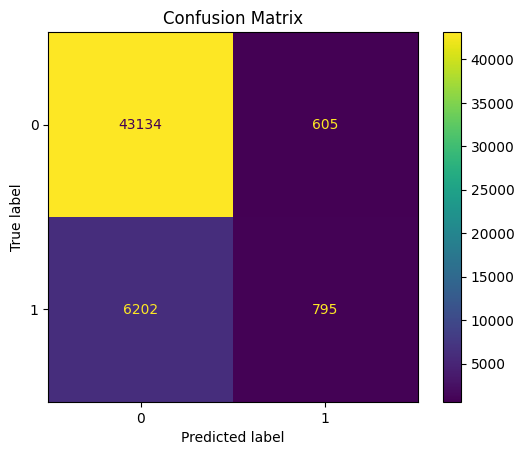

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grid_search.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
presicion, recall, f1 = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

# log metrics
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("presicion", presicion)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

# get confusion matrix values
conf_matrix = confusion_matrix(y_test,y_pred)
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

# log confusion matrix values
mlflow.log_metric("true_positive", true_positive)
mlflow.log_metric("true_negative", true_negative)
mlflow.log_metric("false_positive", false_positive)
mlflow.log_metric("false_negative", false_negative)

# Save confusion matrix plot to a file
plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
# plt.close()

# Log the saved plot as an artifact
mlflow.log_artifact("confusion_matrix.png","confusion_matrix")

print(f"Presicion: {presicion}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print('-'*50)
print(f"Classification Report:\n{class_report}")
print('-'*50)
plt.show()
mlflow.end_run()

In [79]:
!mlflow ui --port 5000

^C
